Data preperation

The first step here will be to prep the data for to perform PCA. we ensure all data is numerical is dropping the non numeric columns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df =pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\GitHub\Enhancing-Public-Health-by-Identifying-Unhealthy-Foods-Promoting-Healthier-Alternatives\datasets\cleaned_final_dataset.csv")
df_numeric= df.select_dtypes(include=["number"])

print(df_numeric.head())

   calories  protein    fat  carbohydrates
0      69.0     3.13   0.89          12.30
1      50.0     3.36   1.90           4.90
2      34.0     3.43   0.08           4.92
3    1014.0    26.30  26.70          38.40
4     233.0     9.30   3.49          46.50


The next step will be to NORMALIZE THE DATA.

So as intructed we use sklearn.preprocessing to standardize the dataset.

In [ ]:
scaler= StandardScaler()

df_scaled =scaler.fit_transform(df_numeric) 

In [ ]:
df_scaled =pd.DataFrame(df_scaled,columns=df_numeric.columns)

df_scaled.to_csv("scaled_dataset.csv",index=False)

As per the scikit learn doc, we need to use the below statement to compute pCA on the scaled dataset
PCA(n_components=n).fit_transform()

and also we need to ensure that fit_transform() is applied for n_components=2 and n_components=3.

In [ ]:
pca_2d =PCA(n_components=2)
df_pca_2d= pca_2d.fit_transform(df_scaled)

pca_3d =PCA(n_components=3)
df_pca_3d= pca_3d.fit_transform(df_scaled)

2D PCA Viz

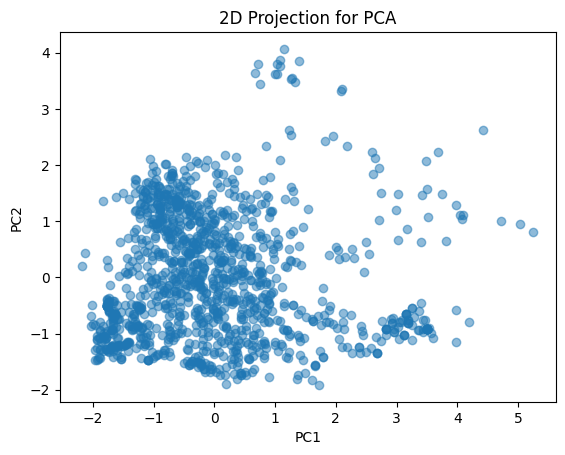

In [ ]:
plt.scatter(df_pca_2d[:,0],df_pca_2d[:,1],alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D Projection for PCA")
plt.show()

3D PCA viz

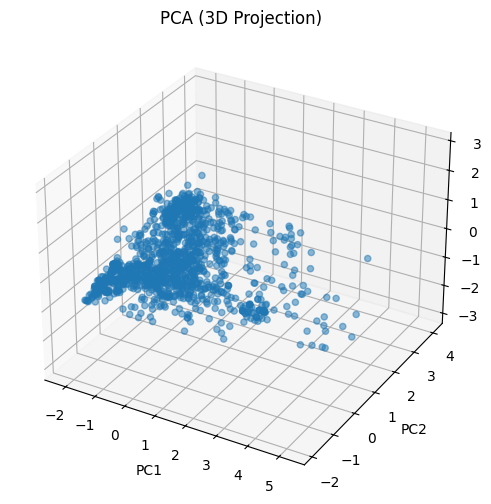

In [ ]:
fig= plt.figure(figsize=(8, 6))
ax =fig.add_subplot(111, projection="3d")
ax.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], alpha=0.5)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA (3D Projection)")
plt.show()

In [ ]:
variance_2d= sum(pca_2d.explained_variance_ratio_) * 100
variance_3d =sum(pca_3d.explained_variance_ratio_) * 100

#this gives the percentage of varianetaht is retained
print(f"Variance retained in 2D: {variance_2d:.2f}%")
print(f"Variance retained in 3D: {variance_3d:.2f}%")

Variance retained in 2D: 74.76%
Variance retained in 3D: 89.38%


In [ ]:
pca_full =PCA().fit(df_scaled)
cumulative_variance= pca_full.explained_variance_ratio_.cumsum()

#this determines the number of componeent for 95%variance
num_components =np.where(cumulative_variance >= 0.95)[0][0] + 1
num_components

np.int64(4)

The above output suggests that w eneed 4 components to retain the 95% variance 

Plot for cumulative variance


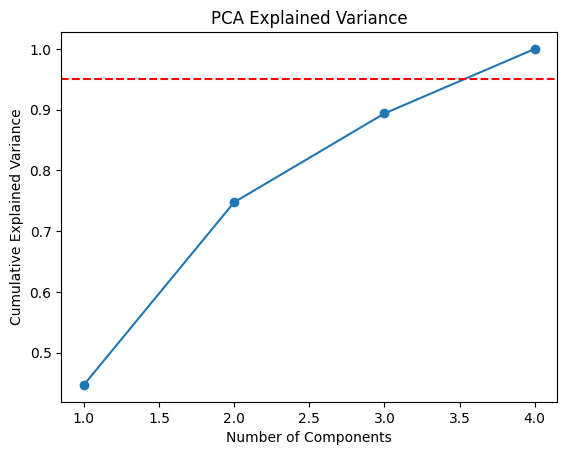

In [ ]:
plt.plot(range(1,len(cumulative_variance)+ 1), cumulative_variance,marker="o")
plt.axhline(y=0.95, color="r", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

In [ ]:
eigen_val =pca_full.explained_variance_
top_3_eigen_val = eigen_val[:3]
print("Top 3 Eigenvalues:", top_3_eigen_val)


Top 3 Eigenvalues: [1.78953625 1.20316951 0.58533296]
